## Model validation on the Iris dataset

### Instructions

In this notebook, we will build, compile and fit a neural network model to the Iris dataset. We will also implement validation, regularisation and callbacks to improve our model.

### Let's get started!

In [1]:
#### PACKAGE IMPORT ####

from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, datasets
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

<tr>
<td><img src="images/iris_setosa.jpg" alt="Drawing" style="height: 270px;"/></td>
<td><img src="images/iris_versicolor.jpg" alt="Drawing" style="height: 270px;"/></td>
<td><img src="images/iris_virginica.jpg" alt="Drawing" style="height: 270px;"/></td>
</tr>

#### The Iris dataset

In this notebook, we will use the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. For a reference, see the following papers:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

Our goal is to construct a neural network that classifies each sample into the correct class, as well as applying validation and regularisation techniques.

#### Load and preprocess the data

First read in the Iris dataset using `datasets.load_iris()`, and split the dataset into training and test sets.

In [2]:
def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    """
    train_data, test_data, train_targets, test_targets = train_test_split(iris_data['data'], iris_data['target'], test_size=0.10)
    return train_data, test_data, train_targets, test_targets

In [3]:
iris_data = datasets.load_iris()

train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [4]:
train_targets

array([2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0,
       1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2,
       2, 2, 1])

In [5]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the neural network model

You can now construct a model to fit to the data. Using the Sequential API, build your model according to the following specifications:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* The first layer should be a dense layer with 64 units.
* The weights of the first layer should be initialised with the He uniform initializer.
* The biases of the first layer should be all initially equal to one.
* There should then be a further four dense layers, each with 128 units.
* This should be followed with four dense layers, each with 64 units.
* All of these Dense layers should use the ReLU activation function.
* The output Dense layer should have 3 units and the softmax activation function.

In total, the network should have 10 layers.

In [6]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.he_uniform(), bias_initializer=tf.keras.initializers.Constant(value=1), input_shape=(input_shape[0],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    return model

In [7]:
# Run your function to get the model

model = get_model(train_data[0].shape)

In [12]:
train_data[0].shape

(4,)

#### Compile the model

You should now compile the model using the `compile` method. Remember that you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [8]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    """
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data

Now you should train the model on the Iris dataset, using the model's `fit` method. 
* Run the training for a fixed number of epochs, given by the function's `epochs` argument.
* Return the training history to be used for plotting the learning curves.
* Set the batch size to 40.
* Set the validation set to be 15% of the training set.

In [10]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    """
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=40, validation_split=0.15)
    return history

In [11]:
# Run your function to train the model

history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 0s 118ms/step - loss: 1.1143 - accuracy: 0.3333 - val_loss: 1.0251 - val_accuracy: 0.3810
Epoch 2/800
3/3 [==============================] - 0s 10ms/step - loss: 1.0682 - accuracy: 0.3333 - val_loss: 0.9869 - val_accuracy: 0.3810
Epoch 3/800
3/3 [==============================] - 0s 9ms/step - loss: 1.0319 - accuracy: 0.3333 - val_loss: 0.9588 - val_accuracy: 0.3810
Epoch 4/800
3/3 [==============================] - 0s 8ms/step - loss: 1.0018 - accuracy: 0.3333 - val_loss: 0.9418 - val_accuracy: 0.3810
Epoch 5/800
3/3 [==============================] - 0s 12ms/step - loss: 0.9834 - accuracy: 0.3333 - val_loss: 0.9204 - val_accuracy: 0.3810
Epoch 6/800
3/3 [==============================] - 0s 9ms/step - loss: 0.9595 - accuracy: 0.3333 - val_loss: 0.8967 - val_accuracy: 0.3810
Epoch 7/800
3/3 [==============================] - 0s 10ms/step - loss: 0.9396 - accuracy: 0.3333 - val_loss: 0.8767 - val_accuracy: 0.3810
Epoch 8/800
3/3 [=====

3/3 [==============================] - 0s 13ms/step - loss: 0.1127 - accuracy: 0.9825 - val_loss: 0.1777 - val_accuracy: 0.9524
Epoch 60/800
3/3 [==============================] - 0s 13ms/step - loss: 0.1080 - accuracy: 0.9825 - val_loss: 0.1731 - val_accuracy: 0.9524
Epoch 61/800
3/3 [==============================] - 0s 12ms/step - loss: 0.1096 - accuracy: 0.9649 - val_loss: 0.1658 - val_accuracy: 0.9524
Epoch 62/800
3/3 [==============================] - 0s 12ms/step - loss: 0.1039 - accuracy: 0.9825 - val_loss: 0.1898 - val_accuracy: 0.9524
Epoch 63/800
3/3 [==============================] - 0s 11ms/step - loss: 0.1059 - accuracy: 0.9649 - val_loss: 0.1642 - val_accuracy: 0.9524
Epoch 64/800
3/3 [==============================] - 0s 10ms/step - loss: 0.0976 - accuracy: 0.9825 - val_loss: 0.1794 - val_accuracy: 0.9524
Epoch 65/800
3/3 [==============================] - 0s 10ms/step - loss: 0.0977 - accuracy: 0.9737 - val_loss: 0.1661 - val_accuracy: 0.9524
Epoch 66/800
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9825 - val_loss: 0.2256 - val_accuracy: 0.9524
Epoch 118/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9825 - val_loss: 0.1921 - val_accuracy: 0.9048
Epoch 119/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0445 - accuracy: 0.9825 - val_loss: 0.2075 - val_accuracy: 0.9524
Epoch 120/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0407 - accuracy: 0.9825 - val_loss: 0.2047 - val_accuracy: 0.9524
Epoch 121/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0414 - accuracy: 0.9825 - val_loss: 0.2046 - val_accuracy: 0.9524
Epoch 122/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0419 - accuracy: 0.9825 - val_loss: 0.2272 - val_accuracy: 0.9524
Epoch 123/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0427 - accuracy: 0.9825 - val_loss: 0.2090 - val_accuracy: 0.9524
Epoch 124/800
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.9912 - val_loss: 0.2283 - val_accuracy: 0.9524
Epoch 176/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9825 - val_loss: 0.2441 - val_accuracy: 0.9524
Epoch 177/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9825 - val_loss: 0.2332 - val_accuracy: 0.9524
Epoch 178/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0367 - accuracy: 0.9912 - val_loss: 0.2106 - val_accuracy: 0.9048
Epoch 179/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.2374 - val_accuracy: 0.9524
Epoch 180/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0295 - accuracy: 0.9825 - val_loss: 0.2613 - val_accuracy: 0.9524
Epoch 181/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0356 - accuracy: 0.9825 - val_loss: 0.2460 - val_accuracy: 0.9524
Epoch 182/800
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9912 - val_loss: 0.2648 - val_accuracy: 0.9524
Epoch 234/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.9825 - val_loss: 0.2670 - val_accuracy: 0.9524
Epoch 235/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0279 - accuracy: 0.9825 - val_loss: 0.2520 - val_accuracy: 0.9048
Epoch 236/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.2591 - val_accuracy: 0.9524
Epoch 237/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.2642 - val_accuracy: 0.9524
Epoch 238/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9825 - val_loss: 0.2563 - val_accuracy: 0.9048
Epoch 239/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.2474 - val_accuracy: 0.9048
Epoch 240/800
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.0399 - accuracy: 0.9825 - val_loss: 0.3175 - val_accuracy: 0.9524
Epoch 292/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.9912 - val_loss: 0.2775 - val_accuracy: 0.9048
Epoch 293/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0533 - accuracy: 0.9649 - val_loss: 0.2794 - val_accuracy: 0.9048
Epoch 294/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9912 - val_loss: 0.3672 - val_accuracy: 0.9524
Epoch 295/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.3063 - val_accuracy: 0.9524
Epoch 296/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9912 - val_loss: 0.2751 - val_accuracy: 0.9048
Epoch 297/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0876 - accuracy: 0.9474 - val_loss: 0.3603 - val_accuracy: 0.9524
Epoch 298/800
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.3025 - val_accuracy: 0.9048
Epoch 350/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.2981 - val_accuracy: 0.9048
Epoch 351/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.3099 - val_accuracy: 0.9048
Epoch 352/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.9825 - val_loss: 0.3216 - val_accuracy: 0.9524
Epoch 353/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 0.9912 - val_loss: 0.2969 - val_accuracy: 0.9048
Epoch 354/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9048
Epoch 355/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.9825 - val_loss: 0.3268 - val_accuracy: 0.9524
Epoch 356/800
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.9825 - val_loss: 0.3239 - val_accuracy: 0.9048
Epoch 407/800
3/3 [==============================] - 0s 11ms/step - loss: 0.0348 - accuracy: 0.9737 - val_loss: 0.3385 - val_accuracy: 0.9524
Epoch 408/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.9912 - val_loss: 0.3641 - val_accuracy: 0.9524
Epoch 409/800
3/3 [==============================] - 0s 10ms/step - loss: 0.0270 - accuracy: 0.9825 - val_loss: 0.3389 - val_accuracy: 0.9048
Epoch 410/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9912 - val_loss: 0.3259 - val_accuracy: 0.9048
Epoch 411/800
3/3 [==============================] - 0s 10ms/step - loss: 0.0204 - accuracy: 0.9912 - val_loss: 0.3474 - val_accuracy: 0.9524
Epoch 412/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.9912 - val_loss: 0.3478 - val_accuracy: 0.9524
Epoch 413/800
3/3 [=====

3/3 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.3565 - val_accuracy: 0.9048
Epoch 465/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.3604 - val_accuracy: 0.9524
Epoch 466/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.3555 - val_accuracy: 0.9048
Epoch 467/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.3610 - val_accuracy: 0.9524
Epoch 468/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.3605 - val_accuracy: 0.9048
Epoch 469/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.3595 - val_accuracy: 0.9048
Epoch 470/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.3581 - val_accuracy: 0.9048
Epoch 471/800
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.9048
Epoch 523/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.3856 - val_accuracy: 0.9048
Epoch 524/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.3884 - val_accuracy: 0.9048
Epoch 525/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.3881 - val_accuracy: 0.9048
Epoch 526/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.3871 - val_accuracy: 0.9524
Epoch 527/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.3881 - val_accuracy: 0.9048
Epoch 528/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.3920 - val_accuracy: 0.9048
Epoch 529/800
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4132 - val_accuracy: 0.9048
Epoch 581/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.4240 - val_accuracy: 0.9048
Epoch 582/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.4233 - val_accuracy: 0.9048
Epoch 583/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.4134 - val_accuracy: 0.9524
Epoch 584/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.4222 - val_accuracy: 0.9048
Epoch 585/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.4286 - val_accuracy: 0.9048
Epoch 586/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.9048
Epoch 587/800
3/3 [========

3/3 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.4262 - val_accuracy: 0.9048
Epoch 639/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.4451 - val_accuracy: 0.9048
Epoch 640/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.9048
Epoch 641/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4262 - val_accuracy: 0.9048
Epoch 642/800
3/3 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.9048
Epoch 643/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.4329 - val_accuracy: 0.9048
Epoch 644/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.4425 - val_accuracy: 0.9048
Epoch 645/800
3/3 [========

Epoch 696/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.4400 - val_accuracy: 0.9524
Epoch 697/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4404 - val_accuracy: 0.9524
Epoch 698/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4855 - val_accuracy: 0.9048
Epoch 699/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.4470 - val_accuracy: 0.9048
Epoch 700/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4382 - val_accuracy: 0.9524
Epoch 701/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.4624 - val_accuracy: 0.9048
Epoch 702/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9048
Epoch 703/800

Epoch 754/800
3/3 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4657 - val_accuracy: 0.9048
Epoch 755/800
3/3 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4661 - val_accuracy: 0.9048
Epoch 756/800
3/3 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.4817 - val_accuracy: 0.9048
Epoch 757/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4673 - val_accuracy: 0.9048
Epoch 758/800
3/3 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4672 - val_accuracy: 0.9048
Epoch 759/800
3/3 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4678 - val_accuracy: 0.9048
Epoch 760/800
3/3 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.00 - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


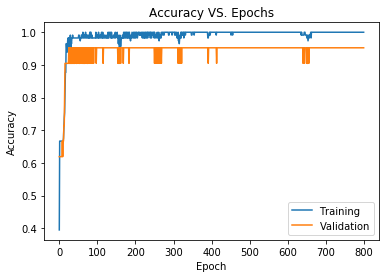

In [20]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy VS. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

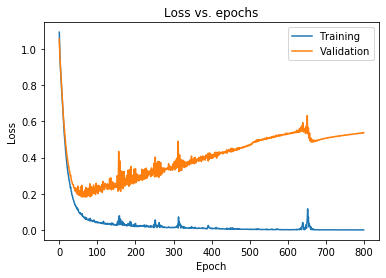

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

You should now define a new regularised model.
The specs for the regularised model are the same as our original model, with the addition of two dropout layers, weight decay, and a batch normalisation layer. 

In particular:

* Add a dropout layer after the 3rd Dense layer
* Then there should be two more Dense layers with 128 units before a batch normalisation layer
* Following this, two more Dense layers with 64 units and then another Dropout layer
* Two more Dense layers with 64 units and then the final 3-way softmax layer
* Add weight decay (l2 kernel regularisation) in all Dense layers except the final softmax layer

In [23]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    """
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), kernel_initializer=tf.keras.initializers.he_uniform(), bias_initializer=tf.keras.initializers.Constant(value=1),input_shape=(input_shape[0],)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(3, activation='softmax')
    ])
    return model

In [24]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [25]:
# Compile the model

compile_model(reg_model)

In [26]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 114 samples, validate on 21 samples
Epoch 1/800
114/114 [==============================] - 2s 20ms/sample - loss: 2.0025 - accuracy: 0.3509 - val_loss: 2.1641 - val_accuracy: 0.1905
Epoch 2/800
114/114 [==============================] - 0s 350us/sample - loss: 2.0122 - accuracy: 0.3596 - val_loss: 2.1280 - val_accuracy: 0.1905
Epoch 3/800
114/114 [==============================] - 0s 317us/sample - loss: 1.9975 - accuracy: 0.3246 - val_loss: 2.0973 - val_accuracy: 0.1905
Epoch 4/800
114/114 [==============================] - 0s 411us/sample - loss: 1.9939 - accuracy: 0.3421 - val_loss: 2.0698 - val_accuracy: 0.1905
Epoch 5/800
114/114 [==============================] - 0s 326us/sample - loss: 1.9337 - accuracy: 0.4035 - val_loss: 2.0430 - val_accuracy: 0.1905
Epoch 6/800
114/114 [==============================] - 0s 328us/sample - loss: 1.9965 - accuracy: 0.3509 - val_loss: 2.0173 - val_accuracy: 0.1905
Epoch 7/800
114/114 [==============================] - 0s 455us/sample - l

114/114 [==============================] - 0s 262us/sample - loss: 0.9178 - accuracy: 0.9649 - val_loss: 1.0166 - val_accuracy: 0.9524
Epoch 112/800
114/114 [==============================] - 0s 219us/sample - loss: 0.9766 - accuracy: 0.9123 - val_loss: 1.0109 - val_accuracy: 0.9524
Epoch 113/800
114/114 [==============================] - 0s 201us/sample - loss: 0.9594 - accuracy: 0.9211 - val_loss: 1.0112 - val_accuracy: 0.9524
Epoch 114/800
114/114 [==============================] - 0s 210us/sample - loss: 0.9508 - accuracy: 0.9298 - val_loss: 0.9948 - val_accuracy: 0.9524
Epoch 115/800
114/114 [==============================] - 0s 227us/sample - loss: 0.9439 - accuracy: 0.9386 - val_loss: 1.0068 - val_accuracy: 0.9524
Epoch 116/800
114/114 [==============================] - 0s 289us/sample - loss: 0.8776 - accuracy: 0.9737 - val_loss: 1.0201 - val_accuracy: 0.9524
Epoch 117/800
114/114 [==============================] - 0s 236us/sample - loss: 0.8912 - accuracy: 0.9649 - val_loss: 1

114/114 [==============================] - 0s 219us/sample - loss: 0.7671 - accuracy: 0.9825 - val_loss: 0.9293 - val_accuracy: 0.9524
Epoch 167/800
114/114 [==============================] - 0s 245us/sample - loss: 0.8116 - accuracy: 0.9561 - val_loss: 0.9496 - val_accuracy: 0.9524
Epoch 168/800
114/114 [==============================] - 0s 210us/sample - loss: 0.7763 - accuracy: 0.9825 - val_loss: 0.9372 - val_accuracy: 0.9524
Epoch 169/800
114/114 [==============================] - 0s 210us/sample - loss: 0.7945 - accuracy: 0.9561 - val_loss: 0.9226 - val_accuracy: 0.9524
Epoch 170/800
114/114 [==============================] - 0s 227us/sample - loss: 0.7689 - accuracy: 0.9649 - val_loss: 0.9181 - val_accuracy: 0.9524
Epoch 171/800
114/114 [==============================] - 0s 210us/sample - loss: 0.7842 - accuracy: 0.9649 - val_loss: 0.9058 - val_accuracy: 0.9524
Epoch 172/800
114/114 [==============================] - 0s 210us/sample - loss: 0.8025 - accuracy: 0.9649 - val_loss: 0

114/114 [==============================] - 0s 236us/sample - loss: 0.7208 - accuracy: 0.9737 - val_loss: 0.9031 - val_accuracy: 0.9524
Epoch 222/800
114/114 [==============================] - 0s 254us/sample - loss: 0.7376 - accuracy: 0.9912 - val_loss: 0.9006 - val_accuracy: 0.9524
Epoch 223/800
114/114 [==============================] - 0s 210us/sample - loss: 0.7023 - accuracy: 0.9912 - val_loss: 0.9015 - val_accuracy: 0.9524
Epoch 224/800
114/114 [==============================] - 0s 219us/sample - loss: 0.7466 - accuracy: 0.9649 - val_loss: 0.9006 - val_accuracy: 0.9048
Epoch 225/800
114/114 [==============================] - 0s 210us/sample - loss: 0.7468 - accuracy: 0.9737 - val_loss: 0.9027 - val_accuracy: 0.9048
Epoch 226/800
114/114 [==============================] - 0s 210us/sample - loss: 0.7930 - accuracy: 0.9649 - val_loss: 0.9019 - val_accuracy: 0.9048
Epoch 227/800
114/114 [==============================] - 0s 219us/sample - loss: 0.7585 - accuracy: 0.9737 - val_loss: 0

114/114 [==============================] - 0s 219us/sample - loss: 0.7229 - accuracy: 0.9825 - val_loss: 0.9458 - val_accuracy: 0.9048
Epoch 277/800
114/114 [==============================] - 0s 245us/sample - loss: 0.7188 - accuracy: 0.9912 - val_loss: 0.9511 - val_accuracy: 0.9048
Epoch 278/800
114/114 [==============================] - 0s 201us/sample - loss: 0.6914 - accuracy: 0.9737 - val_loss: 0.9413 - val_accuracy: 0.9048
Epoch 279/800
114/114 [==============================] - 0s 201us/sample - loss: 0.6704 - accuracy: 1.0000 - val_loss: 0.9441 - val_accuracy: 0.9048
Epoch 280/800
114/114 [==============================] - 0s 192us/sample - loss: 0.6748 - accuracy: 0.9912 - val_loss: 0.9540 - val_accuracy: 0.9048
Epoch 281/800
114/114 [==============================] - 0s 227us/sample - loss: 0.7021 - accuracy: 0.9825 - val_loss: 0.9315 - val_accuracy: 0.9048
Epoch 282/800
114/114 [==============================] - 0s 201us/sample - loss: 0.6915 - accuracy: 0.9825 - val_loss: 0

114/114 [==============================] - 0s 262us/sample - loss: 0.6580 - accuracy: 0.9912 - val_loss: 0.9856 - val_accuracy: 0.9048
Epoch 332/800
114/114 [==============================] - 0s 271us/sample - loss: 0.6364 - accuracy: 1.0000 - val_loss: 0.9321 - val_accuracy: 0.9048
Epoch 333/800
114/114 [==============================] - 0s 219us/sample - loss: 0.6700 - accuracy: 0.9825 - val_loss: 0.8904 - val_accuracy: 0.9048
Epoch 334/800
114/114 [==============================] - 0s 210us/sample - loss: 0.6834 - accuracy: 0.9737 - val_loss: 0.9078 - val_accuracy: 0.9048
Epoch 335/800
114/114 [==============================] - 0s 254us/sample - loss: 0.6712 - accuracy: 0.9825 - val_loss: 0.9334 - val_accuracy: 0.9048
Epoch 336/800
114/114 [==============================] - 0s 227us/sample - loss: 0.6422 - accuracy: 1.0000 - val_loss: 0.9414 - val_accuracy: 0.9048
Epoch 337/800
114/114 [==============================] - 0s 271us/sample - loss: 0.6517 - accuracy: 0.9825 - val_loss: 0

Epoch 386/800
114/114 [==============================] - 0s 324us/sample - loss: 0.6223 - accuracy: 1.0000 - val_loss: 0.9446 - val_accuracy: 0.9048
Epoch 387/800
114/114 [==============================] - 0s 263us/sample - loss: 0.6231 - accuracy: 1.0000 - val_loss: 0.9521 - val_accuracy: 0.9048
Epoch 388/800
114/114 [==============================] - 0s 333us/sample - loss: 0.6269 - accuracy: 0.9912 - val_loss: 0.9570 - val_accuracy: 0.9048
Epoch 389/800
114/114 [==============================] - 0s 254us/sample - loss: 0.6442 - accuracy: 0.9912 - val_loss: 0.9328 - val_accuracy: 0.9048
Epoch 390/800
114/114 [==============================] - 0s 263us/sample - loss: 0.6148 - accuracy: 1.0000 - val_loss: 0.9376 - val_accuracy: 0.9048
Epoch 391/800
114/114 [==============================] - 0s 227us/sample - loss: 0.6206 - accuracy: 0.9912 - val_loss: 0.9493 - val_accuracy: 0.9048
Epoch 392/800
114/114 [==============================] - 0s 227us/sample - loss: 0.6451 - accuracy: 0.9825

Epoch 441/800
114/114 [==============================] - 0s 228us/sample - loss: 0.6275 - accuracy: 0.9825 - val_loss: 0.8868 - val_accuracy: 0.9048
Epoch 442/800
114/114 [==============================] - 0s 236us/sample - loss: 0.6078 - accuracy: 0.9912 - val_loss: 0.8738 - val_accuracy: 0.9048
Epoch 443/800
114/114 [==============================] - 0s 201us/sample - loss: 0.6207 - accuracy: 0.9912 - val_loss: 0.8642 - val_accuracy: 0.9048
Epoch 444/800
114/114 [==============================] - 0s 192us/sample - loss: 0.6270 - accuracy: 0.9825 - val_loss: 0.8665 - val_accuracy: 0.9048
Epoch 445/800
114/114 [==============================] - 0s 236us/sample - loss: 0.5972 - accuracy: 0.9912 - val_loss: 0.8757 - val_accuracy: 0.9048
Epoch 446/800
114/114 [==============================] - 0s 201us/sample - loss: 0.6332 - accuracy: 0.9737 - val_loss: 0.8826 - val_accuracy: 0.9048
Epoch 447/800
114/114 [==============================] - 0s 219us/sample - loss: 0.6028 - accuracy: 0.9912

Epoch 496/800
114/114 [==============================] - 0s 227us/sample - loss: 0.6221 - accuracy: 0.9737 - val_loss: 0.9797 - val_accuracy: 0.9048
Epoch 497/800
114/114 [==============================] - 0s 219us/sample - loss: 0.5975 - accuracy: 0.9825 - val_loss: 0.9188 - val_accuracy: 0.9048
Epoch 498/800
114/114 [==============================] - 0s 210us/sample - loss: 0.6577 - accuracy: 0.9649 - val_loss: 0.8611 - val_accuracy: 0.9048
Epoch 499/800
114/114 [==============================] - 0s 192us/sample - loss: 0.5924 - accuracy: 0.9912 - val_loss: 0.8639 - val_accuracy: 0.9048
Epoch 500/800
114/114 [==============================] - 0s 227us/sample - loss: 0.6154 - accuracy: 0.9825 - val_loss: 0.8531 - val_accuracy: 0.9048
Epoch 501/800
114/114 [==============================] - 0s 219us/sample - loss: 0.5808 - accuracy: 0.9912 - val_loss: 0.8670 - val_accuracy: 0.9048
Epoch 502/800
114/114 [==============================] - 0s 210us/sample - loss: 0.5782 - accuracy: 0.9912

Epoch 551/800
114/114 [==============================] - 0s 254us/sample - loss: 0.5610 - accuracy: 1.0000 - val_loss: 0.8760 - val_accuracy: 0.9048
Epoch 552/800
114/114 [==============================] - 0s 236us/sample - loss: 0.5540 - accuracy: 1.0000 - val_loss: 0.8631 - val_accuracy: 0.9048
Epoch 553/800
114/114 [==============================] - 0s 201us/sample - loss: 0.5624 - accuracy: 0.9912 - val_loss: 0.8365 - val_accuracy: 0.9048
Epoch 554/800
114/114 [==============================] - 0s 227us/sample - loss: 0.5568 - accuracy: 1.0000 - val_loss: 0.8127 - val_accuracy: 0.9048
Epoch 555/800
114/114 [==============================] - 0s 210us/sample - loss: 0.5759 - accuracy: 0.9825 - val_loss: 0.7979 - val_accuracy: 0.9048
Epoch 556/800
114/114 [==============================] - 0s 201us/sample - loss: 0.5592 - accuracy: 0.9912 - val_loss: 0.8050 - val_accuracy: 0.9524
Epoch 557/800
114/114 [==============================] - 0s 289us/sample - loss: 0.5655 - accuracy: 0.9912

Epoch 606/800
114/114 [==============================] - 0s 236us/sample - loss: 0.5687 - accuracy: 0.9825 - val_loss: 0.8115 - val_accuracy: 0.9048
Epoch 607/800
114/114 [==============================] - 0s 236us/sample - loss: 0.5384 - accuracy: 1.0000 - val_loss: 0.8354 - val_accuracy: 0.9048
Epoch 608/800
114/114 [==============================] - 0s 227us/sample - loss: 0.5421 - accuracy: 0.9912 - val_loss: 0.8427 - val_accuracy: 0.9048
Epoch 609/800
114/114 [==============================] - 0s 210us/sample - loss: 0.6103 - accuracy: 0.9825 - val_loss: 0.8235 - val_accuracy: 0.9048
Epoch 610/800
114/114 [==============================] - 0s 227us/sample - loss: 0.5487 - accuracy: 0.9912 - val_loss: 0.8094 - val_accuracy: 0.9048
Epoch 611/800
114/114 [==============================] - 0s 192us/sample - loss: 0.5620 - accuracy: 0.9825 - val_loss: 0.8456 - val_accuracy: 0.9048
Epoch 612/800
114/114 [==============================] - 0s 210us/sample - loss: 0.5419 - accuracy: 1.0000

Epoch 661/800
114/114 [==============================] - 0s 210us/sample - loss: 0.5250 - accuracy: 1.0000 - val_loss: 0.8899 - val_accuracy: 0.9048
Epoch 662/800
114/114 [==============================] - 0s 236us/sample - loss: 0.5323 - accuracy: 1.0000 - val_loss: 0.8817 - val_accuracy: 0.9048
Epoch 663/800
114/114 [==============================] - 0s 271us/sample - loss: 0.5253 - accuracy: 1.0000 - val_loss: 0.8292 - val_accuracy: 0.9048
Epoch 664/800
114/114 [==============================] - 0s 271us/sample - loss: 0.5251 - accuracy: 1.0000 - val_loss: 0.7979 - val_accuracy: 0.9048
Epoch 665/800
114/114 [==============================] - 0s 245us/sample - loss: 0.5699 - accuracy: 0.9737 - val_loss: 0.7816 - val_accuracy: 0.9524
Epoch 666/800
114/114 [==============================] - 0s 254us/sample - loss: 0.5357 - accuracy: 0.9912 - val_loss: 0.7798 - val_accuracy: 0.9524
Epoch 667/800
114/114 [==============================] - 0s 271us/sample - loss: 0.5386 - accuracy: 0.9912

Epoch 716/800
114/114 [==============================] - 0s 210us/sample - loss: 0.5667 - accuracy: 0.9825 - val_loss: 0.7614 - val_accuracy: 0.9524
Epoch 717/800
114/114 [==============================] - 0s 192us/sample - loss: 0.5783 - accuracy: 0.9649 - val_loss: 0.7673 - val_accuracy: 0.9048
Epoch 718/800
114/114 [==============================] - 0s 227us/sample - loss: 0.5183 - accuracy: 0.9912 - val_loss: 0.8155 - val_accuracy: 0.9048
Epoch 719/800
114/114 [==============================] - 0s 192us/sample - loss: 0.5231 - accuracy: 0.9912 - val_loss: 0.8380 - val_accuracy: 0.9048
Epoch 720/800
114/114 [==============================] - 0s 219us/sample - loss: 0.5778 - accuracy: 0.9737 - val_loss: 0.8142 - val_accuracy: 0.9048
Epoch 721/800
114/114 [==============================] - 0s 219us/sample - loss: 0.5074 - accuracy: 1.0000 - val_loss: 0.7967 - val_accuracy: 0.9048
Epoch 722/800
114/114 [==============================] - 0s 201us/sample - loss: 0.5078 - accuracy: 1.0000

Epoch 771/800
114/114 [==============================] - 0s 201us/sample - loss: 0.5410 - accuracy: 0.9825 - val_loss: 0.8072 - val_accuracy: 0.9048
Epoch 772/800
114/114 [==============================] - 0s 201us/sample - loss: 0.5261 - accuracy: 0.9825 - val_loss: 0.7816 - val_accuracy: 0.9048
Epoch 773/800
114/114 [==============================] - 0s 201us/sample - loss: 0.5284 - accuracy: 0.9825 - val_loss: 0.7736 - val_accuracy: 0.9524
Epoch 774/800
114/114 [==============================] - 0s 227us/sample - loss: 0.4993 - accuracy: 0.9912 - val_loss: 0.7816 - val_accuracy: 0.9048
Epoch 775/800
114/114 [==============================] - 0s 236us/sample - loss: 0.5021 - accuracy: 0.9912 - val_loss: 0.7825 - val_accuracy: 0.9524
Epoch 776/800
114/114 [==============================] - 0s 210us/sample - loss: 0.5023 - accuracy: 1.0000 - val_loss: 0.7781 - val_accuracy: 0.9524
Epoch 777/800
114/114 [==============================] - 0s 236us/sample - loss: 0.4955 - accuracy: 1.0000

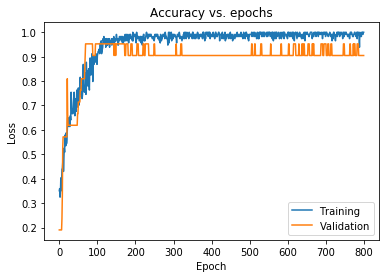

In [27]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

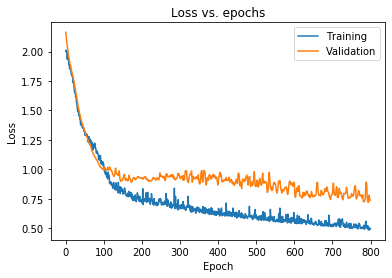

In [28]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
You will now incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.

Fill in the function below so that:

* It creates an `EarlyStopping` callback object and a `ReduceLROnPlateau` callback object
* The early stopping callback is used and monitors validation loss with the mode set to `"min"` and patience of 30.
* The learning rate reduction on plateaux is used with a learning rate factor of 0.2 and a patience of 20.

In [29]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    early_stopping = tf.keras.callbacks.EarlyStopping(mode='min', patience=30)
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)
    return (early_stopping, learning_rate_reduction)

In [30]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [31]:
learning_rate_reduction.patience

20

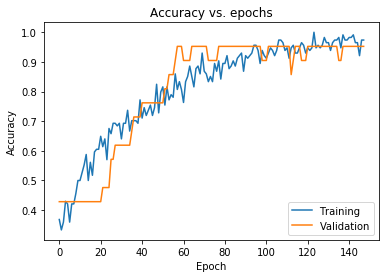

In [32]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

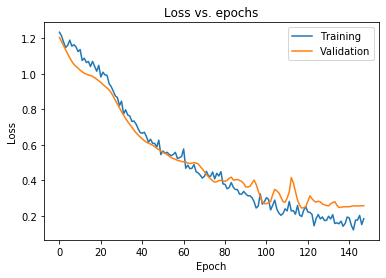

In [33]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [34]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.287
Test accuracy: 86.67%
